In [90]:
import numpy as np
import matplotlib.pyplot as plt

(100, 2)


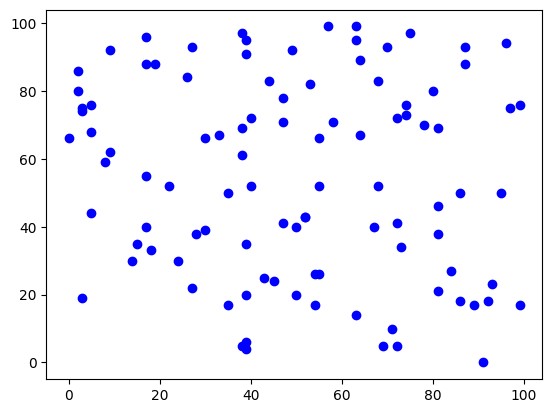

In [91]:
m = 100 # number of samples

input = np.random.randint(0, 100, (m, 2))
print(input.shape)

plt.scatter(input[:, 0], input[:, 1], c='blue', marker='o', label='Input Data')
plt.show()

In [92]:
label = np.zeros((m, 1), dtype=int)  # initialize labels as a 2D array with shape (m,1)
for i in range(m):
    if input[i][0] + input[i][1] > 100:
        label[i] = 1

print(label.shape)

(100, 1)


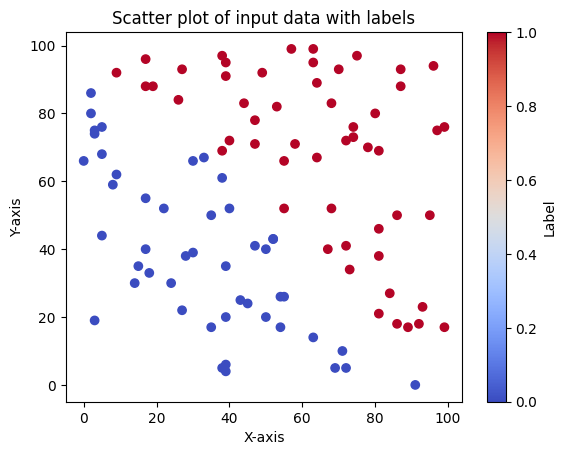

In [93]:
# visualizing the data; if label is 1, color it red, else color it blue
x = input[:, 0]
y = input[:, 1]
plt.scatter(x, y, c=label[:, 0], cmap='coolwarm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of input data with labels')
plt.colorbar(label='Label')
plt.show()


In [94]:
X = input.transpose()
wt = np.random.rand(2, 1)  # initialize weights randomly
b = np.random.rand()
print(X.shape, wt.shape)
print(b)

(2, 100) (2, 1)
0.48567615768950134


Iteration 0, Cost: 74.15897770928945
Iteration 1, Cost: 74.12498432089147
Iteration 2, Cost: 74.09116498244681
Iteration 3, Cost: 74.05751879812668
Iteration 4, Cost: 74.02404487548468
Iteration 5, Cost: 73.99074232546008
Iteration 6, Cost: 73.9576102623807
Iteration 7, Cost: 73.92464780396567
Iteration 8, Cost: 73.89185407132794
Iteration 9, Cost: 73.85922818897653
Iteration 10, Cost: 73.82676928481851
Iteration 11, Cost: 73.79447649016103
Iteration 12, Cost: 73.76234893971275
Iteration 13, Cost: 73.73038577158532
Iteration 14, Cost: 73.69858612729459
Iteration 15, Cost: 73.66694915176161
Iteration 16, Cost: 73.63547399331337
Iteration 17, Cost: 73.60415980368337
Iteration 18, Cost: 73.57300573801206
Iteration 19, Cost: 73.54201095484697
Iteration 20, Cost: 73.5111746161427
Iteration 21, Cost: 73.48049588726066
Iteration 22, Cost: 73.44997393696882
Iteration 23, Cost: 73.41960793744092
Iteration 24, Cost: 73.38939706425576
Iteration 25, Cost: 73.35934049639633
Iteration 26, Cost: 73.3

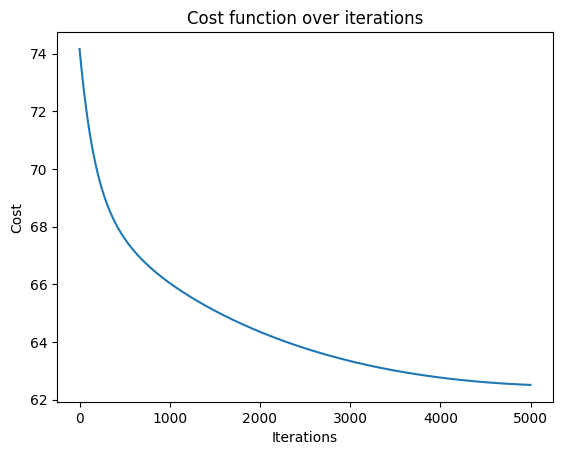

In [95]:
wt = np.random.rand(2, 1)  # initialize weights randomly
b = np.random.rand()  # initialize bias randomly

X_norm = X / 100 # normalize input data

def forward(wt, X, b):
    Z = np.dot(wt.T, X) + b
    A = 1 / (1 + np.exp(-Z))
    return A

def backward(A, label, X, m):
    diff = A.T - label  
    dw = np.dot(X, diff) / m
    db = np.sum(diff) / m
    return dw, db

def compute_cost(A, label, epsilon=1e-10):
    m = label.shape[0]
    cost = -1/m * np.sum(label * np.log(A.T + epsilon) + (1 - label) * np.log(1 - A + epsilon))
    return cost

def update(wt, b, dw, db, learning_rate):
    wt -= learning_rate * dw
    b -= learning_rate * db
    return wt, b

dw, db = np.zeros(wt.shape), 0 # initialize gradients
epsilon = 1e-10  # small value to avoid log(0)


# Gradient Descent
learning_rate = 0.01
costs = []
for i in range(5000):  # number of iterations
    A = forward(wt, X_norm, b)
    dw, db = backward(A, label, X_norm, m)
    wt, b = update(wt, b, dw, db, learning_rate)

    J = compute_cost(A, label, epsilon)
    costs.append(J)

    if i % 1 == 0:  # print cost every iteration
        print(f"Iteration {i}, Cost: {J}")

"""
Note to self - learn more about gradient descent optimization, learning rate etc, hyperparameter tuning. When using pytorch, these benefits come standard. but how do they work? And more importantly why.
I notice in this bare bones implementation, the gradient descent is not always optimal, often it does not converge to the global minimum.
"""

# Plotting the cost function
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

(100, 1)


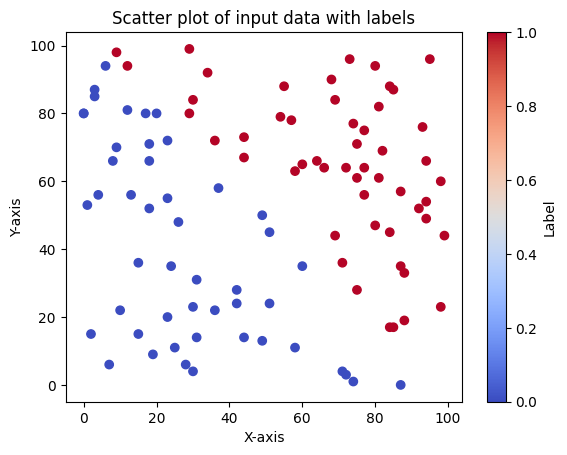

(1, 100)


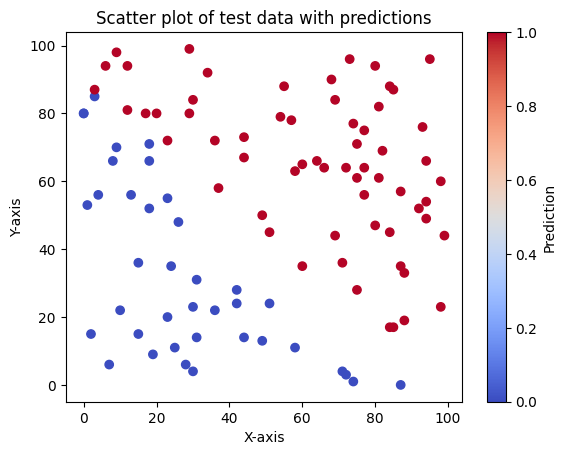

Accuracy: 90.0%


In [96]:
# test the model
m = 100 # number of samples
test_input = np.random.randint(0, 100, (m, 2))

test_label = np.zeros((m, 1), dtype=int)  # initialize labels as a 2D array with shape (m,1)
for i in range(m):
    if test_input[i][0] + test_input[i][1] > 100:
        test_label[i] = 1

print(test_label.shape)

# visualizing the data; if label is 1, color it red, else color it blue
x = test_input[:, 0]
y = test_input[:, 1]
plt.scatter(x, y, c=test_label[:, 0], cmap='coolwarm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of input data with labels')
plt.colorbar(label='Label')
plt.show()

# test the model
X_test = test_input.transpose()
X_test_norm = X_test / 100 # normalize input data
A_test = forward(wt, X_test_norm, b)
predictions = np.where(A_test > 0.5, 1, 0)  # thresholding
print(predictions.shape)
# visualizing the test data with predictions
plt.scatter(test_input[:, 0], test_input[:, 1], c=predictions.flatten(), cmap='coolwarm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of test data with predictions')
plt.colorbar(label='Prediction')
plt.show()

# Calculate accuracy
accuracy = np.mean(predictions.flatten() == test_label.flatten()) * 100
print(f"Accuracy: {accuracy}%")